In [1]:
import pandas as pd

df = pd.read_csv('Tesla.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df.shape

(1692, 7)

In [4]:
df1 = df.reset_index()["Close"]

In [5]:
df1.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

In [6]:
df1.shape

(1692,)

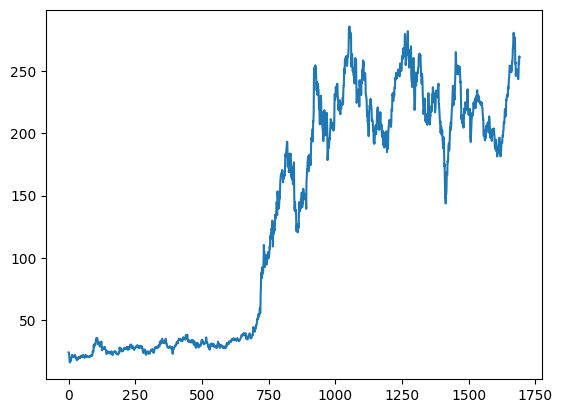

In [7]:
import matplotlib.pyplot as plt

plt.plot(df1)

MinMax scaler

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1.shape

(1692, 1)

In [10]:
df1

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

Splitting Dataset

In [11]:
training_size = int(len(df1)*0.7)
test_size = len(df)-training_size
train_data, test_data = df1[0:training_size], df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(1184, 508)

Data Preprocessing

In [13]:
def create_dataset(dataset, time_step):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train

array([[0.02993635, 0.02971433, 0.02279455, ..., 0.05550621, 0.05132475,
        0.05065867],
       [0.02971433, 0.02279455, 0.01258141, ..., 0.05132475, 0.05065867,
        0.05213883],
       [0.02279455, 0.01258141, 0.00114713, ..., 0.05065867, 0.05213883,
        0.05620929],
       ...,
       [0.77260949, 0.78174952, 0.79151861, ..., 0.69064534, 0.6839476 ,
        0.6589698 ],
       [0.78174952, 0.79151861, 0.77912226, ..., 0.6839476 , 0.6589698 ,
        0.64786856],
       [0.79151861, 0.77912226, 0.78330369, ..., 0.6589698 , 0.64786856,
        0.64579633]])

In [16]:
y_train

array([0.05213883, 0.05620929, 0.0651273 , ..., 0.64786856, 0.64579633,
       0.65845174])

In [17]:
print(X_train.shape), print(y_train.shape)

(1083, 100)
(1083,)


(None, None)

In [18]:
print(X_test.shape), print(y_test.shape)

(407, 100)
(407,)


(None, None)

In [19]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

LSTM model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\chaud\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.1200 - val_loss: 0.0533
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0111 - val_loss: 0.0061
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3

Prediction

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

130.66683507461502

In [27]:
math.sqrt(mean_squared_error(y_test, test_predict))

221.28225970603393

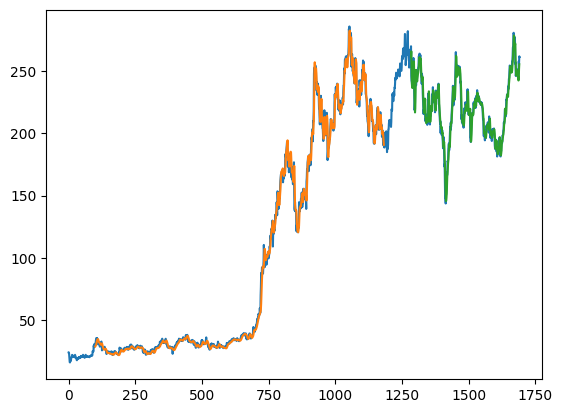

In [28]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction on future

In [32]:
x_input = test_data[408:].reshape(1,-1)

In [33]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [34]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i+=1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i+=1

print(lst_output)

[0.9055679]
101
1 day input [0.69027527 0.68990526 0.69645496 0.68150531 0.67321636 0.64753548
 0.63728537 0.6350651  0.6466844  0.65649053 0.66289223 0.64483419
 0.62740527 0.63928357 0.61297362 0.62155861 0.62215063 0.63965363
 0.62618413 0.62433392 0.64894165 0.65623147 0.66921991 0.66725869
 0.64302102 0.6423919  0.61456483 0.61304764 0.63277086 0.62925548
 0.65626846 0.6530861  0.65267905 0.65360416 0.67477053 0.67676878
 0.67266132 0.69083037 0.69171843 0.71414293 0.7101095  0.71288481
 0.73097983 0.75388541 0.75466252 0.73593837 0.732275   0.74448638
 0.78149052 0.7806024  0.78896532 0.79736527 0.79214768 0.79162962
 0.79111156 0.82130696 0.81327707 0.82356422 0.84354643 0.84713584
 0.86264058 0.88369595 0.88317789 0.87592506 0.87755325 0.86896831
 0.87377881 0.86382474 0.87237269 0.87155859 0.89538921 0.89431617
 0.91133799 0.93768503 0.93779604 0.97986973 0.98127591 0.9767614
 0.93675993 0.94889729 0.96799144 0.95363381 0.88880253 0.89253993
 0.85268646 0.86660005 0.86671106 0

In [35]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [36]:
len(df1)

1692

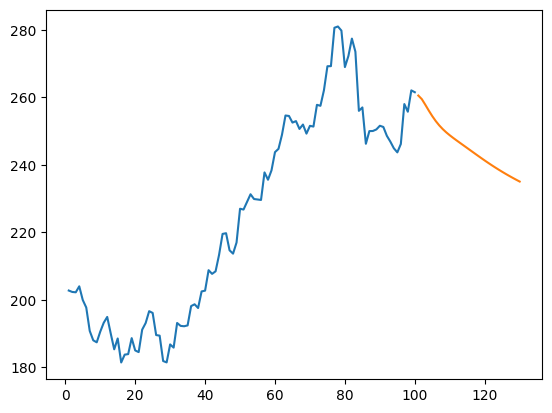

In [38]:
plt.plot(day_new, scaler.inverse_transform(df1[1592:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

So, the above graph shows prediction on future 30 days